<a href="https://colab.research.google.com/github/namanjn1988/EarthQuakeDamage/blob/master/EarthQuakePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
!git clone -l -s git://github.com/namanjn1988/EarthQuakeDamage cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 5), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 6.63 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/cloned-repo
EarthQuakePrediction.ipynb  test_values.csv   train_values.csv
README.md		    train_labels.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve, f1_score, confusion_matrix

In [0]:
def draw_colormat(df, first_col ):
    
    corrmat = df.corr()
    k = len(df.columns) #number of variables for heatmap
    cols = corrmat.nlargest(k, first_col)[first_col].index
    cm = np.corrcoef(dataset[cols].values.T)
    sns.set(font_scale=1.75)
    f, ax = plt.subplots(figsize=(k*1.5, k*1.5))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='1.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

In [0]:
dataset = pd.merge(pd.read_csv('train_values.csv'),pd.read_csv('train_labels.csv'))

In [0]:
dataset.info()

In [0]:
dataset.head()

In [0]:
dataset['land_surface_condition_N'] = (dataset['land_surface_condition'] == 'n').astype('int')
dataset['land_surface_condition_O'] = (dataset['land_surface_condition'] == 'o').astype('int')

dataset['foundation_type_H'] = (dataset['foundation_type'] == 'h').astype('int')
dataset['foundation_type_I'] = (dataset['foundation_type'] == 'i').astype('int')
dataset['foundation_type_R'] = (dataset['foundation_type'] == 'r').astype('int')
dataset['foundation_type_U'] = (dataset['foundation_type'] == 'u').astype('int')

dataset['roof_type_N'] = (dataset['roof_type'] == 'n').astype('int')
dataset['roof_type_Y'] = (dataset['roof_type'] == 'y').astype('int')

dataset['ground_floor_type_F'] = (dataset['ground_floor_type'] == 'f').astype('int')
dataset['ground_floor_type_M'] = (dataset['ground_floor_type'] == 'm').astype('int')
dataset['ground_floor_type_V'] = (dataset['ground_floor_type'] == 'v').astype('int')
dataset['ground_floor_type_X'] = (dataset['ground_floor_type'] == 'x').astype('int')

dataset['other_floor_type_J'] = (dataset['other_floor_type'] == 'j').astype('int')
dataset['other_floor_type_Q'] = (dataset['other_floor_type'] == 'q').astype('int')
dataset['other_floor_type_S'] = (dataset['other_floor_type'] == 's').astype('int')

dataset['position_J'] = (dataset['position'] == 'j').astype('int')
dataset['position_O'] = (dataset['position'] == 'o').astype('int')
dataset['position_S'] = (dataset['position'] == 's').astype('int')

dataset['plan_configuration_A'] = (dataset['plan_configuration'] == 'a').astype('int')
dataset['plan_configuration_C'] = (dataset['plan_configuration'] == 'c').astype('int')
dataset['plan_configuration_D'] = (dataset['plan_configuration'] == 'd').astype('int')
dataset['plan_configuration_f'] = (dataset['plan_configuration'] == 'f').astype('int')
dataset['plan_configuration_M'] = (dataset['plan_configuration'] == 'm').astype('int')
dataset['plan_configuration_N'] = (dataset['plan_configuration'] == 'n').astype('int')
dataset['plan_configuration_O'] = (dataset['plan_configuration'] == 'o').astype('int')
dataset['plan_configuration_Q'] = (dataset['plan_configuration'] == 'q').astype('int')
dataset['plan_configuration_S'] = (dataset['plan_configuration'] == 's').astype('int')

dataset['legal_ownership_status_A'] = (dataset['legal_ownership_status'] == 'a').astype('int')
dataset['legal_ownership_status_R'] = (dataset['legal_ownership_status'] == 'r').astype('int')
dataset['legal_ownership_status_V'] = (dataset['legal_ownership_status'] == 'v').astype('int')



In [0]:

dataset.insert(1,"geo_id",dataset['geo_level_1_id'].astype(str) + dataset['geo_level_2_id'].astype(str).apply(lambda x: x.zfill(4)) + dataset['geo_level_3_id'].astype(str).apply(lambda x: x.zfill(5)))

dataset['geo_id'] = dataset['geo_id'].astype('int64')


In [0]:
dataset.drop('land_surface_condition', axis=1, inplace=True)
dataset.drop('foundation_type', axis=1, inplace=True)
dataset.drop('roof_type', axis=1, inplace=True)
dataset.drop('ground_floor_type', axis=1, inplace=True)
dataset.drop('other_floor_type', axis=1, inplace=True)
dataset.drop('position', axis=1, inplace=True)
dataset.drop('plan_configuration', axis=1, inplace=True)
dataset.drop('legal_ownership_status', axis=1, inplace=True)
#dataset.drop('geo_level_1_id', axis=1, inplace=True)
#dataset.drop('geo_level_2_id', axis=1, inplace=True)
#dataset.drop('geo_level_3_id', axis=1, inplace=True)

In [10]:
dataset.head()

,building_id,geo_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_N,land_surface_condition_O,foundation_type_H,foundation_type_I,foundation_type_R,foundation_type_U,roof_type_N,roof_type_Y,ground_floor_type_F,ground_floor_type_M,ground_floor_type_V,ground_floor_type_X,other_floor_type_J,other_floor_type_Q,other_floor_type_S,position_J,position_O,position_S,plan_configuration_A,plan_configuration_C,plan_configuration_D,plan_configuration_f,plan_configuration_M,plan_configuration_N,plan_configuration_O,plan_configuration_Q,plan_configuration_S,legal_ownership_status_A,legal_ownership_status_R,legal_ownership_status_V
0,802906,6048712198,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,28830,8090002812,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,94947,21036308973,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,590882,22041810694,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,201944,11013101488,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


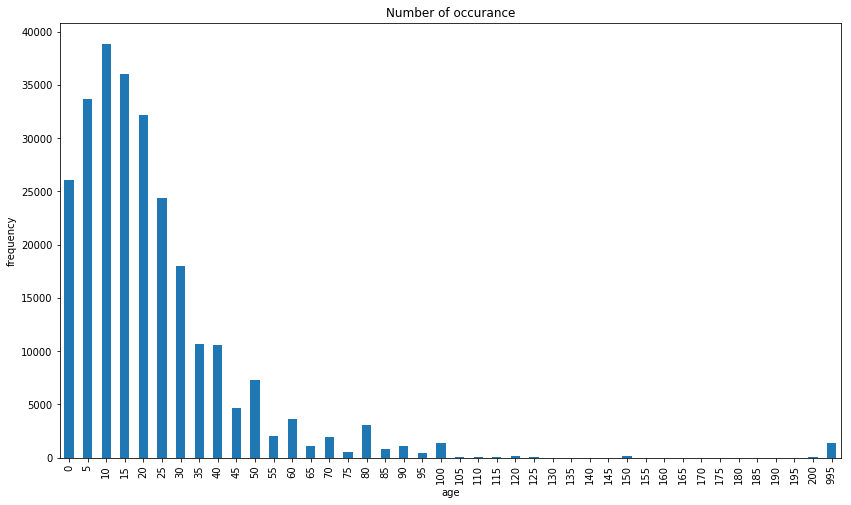

In [11]:
ax = dataset['age'].value_counts().sort_index().plot(kind='bar', figsize=(14,8), title="Number of occurance")
ax.set_xlabel("age")
ax.set_ylabel("frequency")
plt.show()


In [0]:
target_name = 'damage_grade'
X = dataset.drop('damage_grade', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y= dataset[target_name]

In [0]:
#draw_colormat(dataset, 'damage_grade' )

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [0]:
def CMatric(CM, lables=['GRADE 1','GRADE 2','GRADE 3']):
	df = pd.DataFrame(data=CM, index=lables, columns=lables)
	df.index.name='TRUE'
	df.columns.name='PREDICTION'
	df.loc['Total'] = df.sum()
	df['Total'] = df.sum(axis=1)
	return df

In [0]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'], columns= ['NULL'])

In [0]:
def update_metric(model,y_pred, y_test ):
  
  metrics[model]  = model     
  metrics.loc['accuracy',model] = accuracy_score(y_pred=y_pred, y_true=y_test)
  metrics.loc['precision',model] = precision_score(y_pred=y_pred, y_true=y_test,average='micro')
  metrics.loc['recall',model] = recall_score(y_pred=y_pred, y_true=y_test, average='micro')

  CM = confusion_matrix(y_pred=y_pred, y_true=y_test)
  CMatric(CM)

# **1. Null Model**

In [13]:
y_train.groupby(y_train).count()




damage_grade
1    16810
2    98853
3    58071
Name: damage_grade, dtype: int64

In [14]:
# 2 came from above output as it is most frequent damage grade.
y_pred = np.repeat(2,y_test.size) 
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred, y_true=y_test,average='micro')
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred, y_true=y_test, average='micro')

CM = confusion_matrix(y_pred=y_pred, y_true=y_test)
CMatric(CM)

PREDICTION,GRADE 1,GRADE 2,GRADE 3,Total
TRUE,,,,
GRADE 1,0,8314,0,8314
GRADE 2,0,49406,0,49406
GRADE 3,0,29147,0,29147
Total,0,86867,0,86867


In [15]:
metrics

,NULL
accuracy,0.568755
precision,0.568755
recall,0.568755


# 2. Random Forest Regression Model

In [0]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 2)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = np.round(regressor.predict(X_test))

In [0]:
update_metric('RandomForestRegressor', y_pred, y_test)

# 3. Random Forest Classification Model

In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
update_metric('RandomForestClassifior', y_pred, y_test)

In [24]:
metrics

,NULL,RandomForestRegressor,RandomForestClassifior
accuracy,0.568755,0.713424,0.700795
precision,0.568755,0.713424,0.700795
recall,0.568755,0.713424,0.700795


# 4. Naive Bayes Model

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
update_metric('Naive Bayes', y_pred, y_test)

# 5. Linear classification

In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result
y_pred = np.round(classifier.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
update_metric('Linear', y_pred, y_test)


In [29]:
metrics

,NULL,RandomForestRegressor,RandomForestClassifior,Naive Bayes,Linear
accuracy,0.568755,0.713424,0.700795,0.403145,0.590604
precision,0.568755,0.713424,0.700795,0.403145,0.590604
recall,0.568755,0.713424,0.700795,0.403145,0.590604
